In [622]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import random

np.random.seed(42)
random.seed(42)

In [623]:
df = pd.read_csv('train.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [624]:
df.describe()

,id,host_id,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,price,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3.353800e+04,3.353800e+04,0.0,33533.000000,33538.000000,33478.000000,33505.000000,33507.000000,341.000000,33538.000000,...,33538.000000,25874.000000,25844.000000,25859.000000,25829.000000,25849.000000,25830.000000,25827.000000,33538.000000,26591.000000
mean,1.566316e+07,5.420691e+07,NaN,10.006799,2.856789,1.141376,1.176869,1.571313,738.958944,145.177291,...,21.635548,93.751488,9.599443,9.255153,9.737466,9.754304,9.500542,9.374647,3.956288,1.429904
std,8.788870e+06,6.149736e+07,NaN,85.869452,1.848491,0.425003,0.744365,1.054226,580.780447,133.085709,...,40.488277,8.315867,0.819684,1.073818,0.706306,0.688775,0.781516,0.888392,12.687366,1.672336
min,2.515000e+03,2.830000e+02,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,8.173466e+06,7.130984e+06,NaN,1.000000,2.000000,1.000000,1.000000,1.000000,400.000000,69.000000,...,1.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.210000
50%,1.633786e+07,2.662292e+07,NaN,1.000000,2.000000,1.000000,1.000000,1.000000,700.000000,109.000000,...,5.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.770000
75%,2.276632e+07,8.248502e+07,NaN,2.000000,4.000000,1.000000,1.000000,2.000000,1000.000000,175.000000,...,23.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.140000
max,2.977318e+07,2.240015e+08,NaN,2271.000000,16.000000,16.500000,10.000000,18.000000,5000.000000,1999.000000,...,557.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,132.000000,19.890000


In [625]:
df.columns

Index(['id', 'name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_id', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'country_code', 'country', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_ch

In [626]:
df = df.drop(columns=['name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview',\
                      'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_id', 'host_name',\
                      'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate',\
                      'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count',\
                      'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed',\
                      'city', 'state', 'zipcode', 'market', 'country_code', 'country', 'amenities', 'first_review',\
                      'last_review', 'is_business_travel_ready', 'require_guest_profile_picture',\
                      'require_guest_phone_verification', 'calculated_host_listings_count', 'reviews_per_month'])

In [627]:
df = df.drop(columns=['square_feet', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',\
                      'review_scores_checkin', 'review_scores_communication', 'review_scores_location',\
                      'review_scores_value', 'id', 'maximum_nights', 'instant_bookable', 'beds', 'cancellation_policy',\
                      'property_type'])
df.head()

,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,bedrooms,bed_type,price,guests_included,extra_people,minimum_nights,number_of_reviews
0,Brooklyn,Entire home/apt,2,1.0,1.0,Real Bed,145.0,2,$30.00,7,6
1,Manhattan,Entire home/apt,8,1.0,3.0,Real Bed,175.0,3,$19.00,3,137
2,Manhattan,Entire home/apt,2,1.0,0.0,Real Bed,180.0,1,$0.00,2,3
3,Brooklyn,Private room,1,1.0,1.0,Real Bed,42.0,1,$0.00,3,0
4,Brooklyn,Private room,2,1.0,1.0,Real Bed,80.0,1,$14.00,1,144


In [628]:
df.describe()

,accommodates,bathrooms,bedrooms,price,guests_included,minimum_nights,number_of_reviews
count,33538.000000,33478.000000,33505.000000,33538.000000,33538.000000,33538.000000,33538.000000
mean,2.856789,1.141376,1.176869,145.177291,1.503190,6.843074,21.635548
std,1.848491,0.425003,0.744365,133.085709,1.114226,19.781187,40.488277
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,69.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000,109.000000,1.000000,2.000000,5.000000
75%,4.000000,1.000000,1.000000,175.000000,2.000000,5.000000,23.000000
max,16.000000,16.500000,10.000000,1999.000000,16.000000,1250.000000,557.000000


In [629]:
values = {'bathrooms': 1.141376, 'bedrooms': 1.176869, 'beds': 1.571313}
df = df.fillna(value=values)

df['extra_people'] = df['extra_people'].replace('[\$,]', '', regex=True).astype(float)

df['logreviews'] = np.log(1 + df['number_of_reviews'])

df['bedrooms_per_accommodates'] = df['bedrooms'] / df['accommodates']
df = df.drop(columns=['accommodates', 'bedrooms'])

In [630]:
df.isnull().sum()

neighbourhood_group_cleansed    0
room_type                       0
bathrooms                       0
bed_type                        0
price                           0
guests_included                 0
extra_people                    0
minimum_nights                  0
number_of_reviews               0
logreviews                      0
bedrooms_per_accommodates       0
dtype: int64

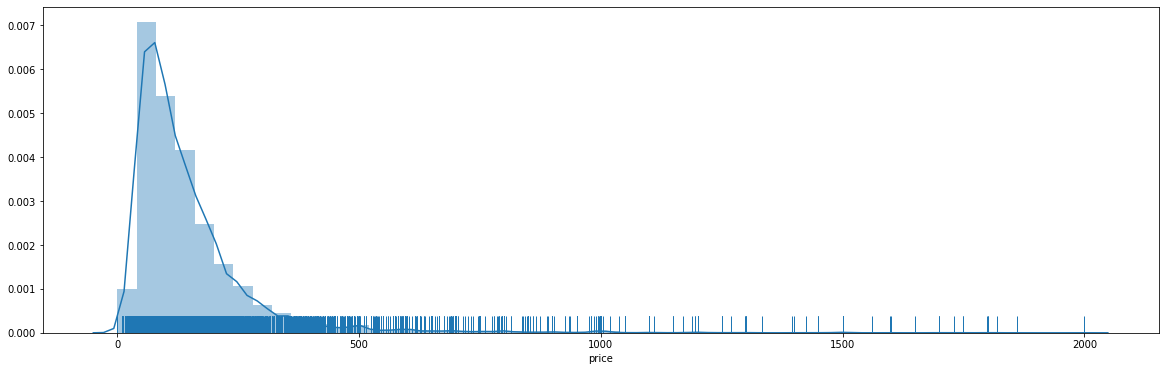

In [631]:
plt.figure(figsize=(20,6))
sb.distplot(df['price'], rug=True)

In [632]:
data = df.copy()
print('amount of data original: ' + str(len(data)))
data = data[data['number_of_reviews'] > 10] ### <<---  Change 10 for any other number to change the minimum number of reviews you require
print('amount of data after removing "few reviews" properties: ' + str(len(data)))

amount of data original: 33538
amount of data after removing "few reviews" properties: 12604


In [633]:
data = pd.get_dummies(data)
data.head()

,bathrooms,price,guests_included,extra_people,minimum_nights,number_of_reviews,logreviews,bedrooms_per_accommodates,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,...,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
1,1.0,175.0,3,19.0,3,137,4.927254,0.375,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1.0,80.0,1,14.0,1,144,4.976734,0.500,0,1,...,0,0,0,1,0,0,0,0,0,1
6,1.0,177.0,2,25.0,3,12,2.564949,0.250,0,0,...,0,0,1,0,0,0,0,0,0,1
9,1.0,106.0,2,25.0,1,30,3.433987,0.250,0,1,...,0,0,1,0,0,0,0,0,0,1
17,2.0,285.0,2,20.0,3,118,4.779123,0.500,0,1,...,0,0,1,0,0,0,0,0,0,1


In [634]:
X = data.copy().drop('price', axis = 1)
y = data['price'].copy()

In [635]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [636]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [641]:
baseline = y_train.median() #median train
print('If we just take the median value, our baseline, we would say that an overnight stay in Frankfurt costs: ' + str(baseline))


If we just take the median value, our baseline, we would say that an overnight stay in Frankfurt costs: 109.0


In [642]:
baseline_error = np.sqrt(mean_squared_error(y_pred=np.ones_like(y_test) * baseline, y_true=y_test))
print('And we will be right +- ' + str(baseline_error))

And we will be right +- 114.24387078552469


In [643]:
lr = LinearRegression()
alphas = [1000, 100, 50, 20, 10, 1, 0.1, 0.01]
l1_ratios = [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
ridge = RidgeCV(alphas=alphas)
lasso = LassoCV(alphas=alphas, max_iter=10000)
elastic = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios)

In [644]:
for model, name in zip([lr, ridge, lasso, elastic], ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']):
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    mrse_train = np.sqrt(mean_squared_error(y_pred=y_pred_train, y_true=y_train))
    y_pred = model.predict(X_test_scaled)
    mrse_test = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_test))
    best_alpha = ''
    if name != 'LinearRegression':
        best_alpha = ' best alpha: ' + str(model.alpha_)
    best_l1 = ''
    if name == 'ElasticNet':
        best_l1 = ' best l1: '+ str(model.l1_ratio_)
    print(name + ' mrse_train: ' + str(mrse_train) + ', mrse_test: ' + str(mrse_test) + best_alpha + best_l1)

LinearRegression mrse_train: 89.5327239828441, mrse_test: 82.35186433938185
Ridge mrse_train: 89.53376907026221, mrse_test: 82.3407806830255 best alpha: 100.0
Lasso mrse_train: 89.60603230542876, mrse_test: 82.25042104002152 best alpha: 1.0
ElasticNet mrse_train: 89.54799263126708, mrse_test: 82.30480876901125 best alpha: 0.1 best l1: 0.7


In [596]:
import pandas as pd

test_df = pd.read_csv('test.csv')

In [645]:
test_y = lr.predict(X_train_scaled)
test_y[0:10]

array([182.45682607, 125.53885732, 211.78104482, ..., 134.4744042 ,
        41.95023428,  38.70023428])

In [586]:
order = np.argsort(np.abs(lasso.coef_))[::-1]
for i in order:
    coef_ = lasso.coef_[i]
    if coef_ > 0:
        print(X.columns[i] + ', ' + str(lasso.coef_[i]))

room_type_Entire home/apt, 43.75053374575034
bathrooms, 32.29921098154513
neighbourhood_group_cleansed_Manhattan, 27.5469943822196
guests_included, 24.675438855291528
bedrooms_per_accommodates, 2.3611905201337144
extra_people, 2.3036120548070365
bed_type_Couch, 1.7327681752313753


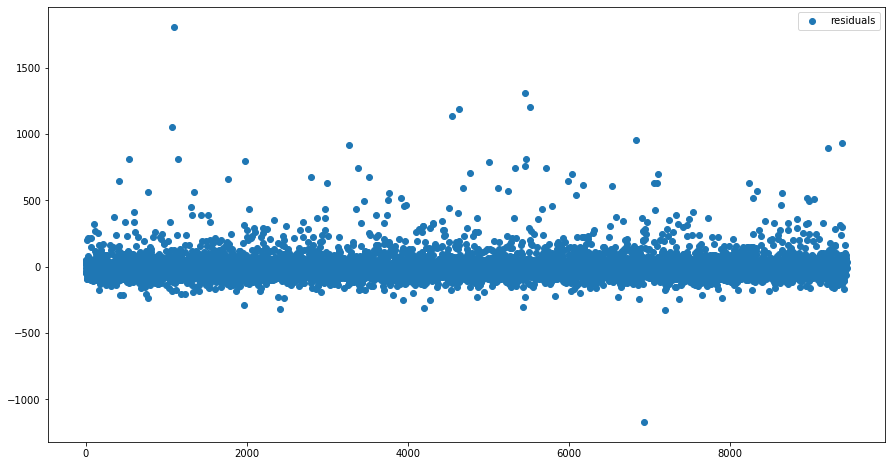

In [587]:
y_pred_train = lasso.predict(X_train_scaled)
diff = y_train - y_pred_train
plt.figure(figsize=(15,8))
plt.scatter(np.arange(len(diff)), diff, label = 'residuals')
plt.legend()

In [588]:
X_train[np.abs(diff) > 100].describe()

,bathrooms,guests_included,extra_people,minimum_nights,number_of_reviews,logreviews,bedrooms_per_accommodates,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
count,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000,967.000000
mean,1.551706,2.562565,24.712513,6.042399,48.257497,3.565894,0.393078,0.011375,0.288521,0.647363,0.051706,0.001034,0.825233,0.165460,0.009307,0.001034,0.002068,0.005171,0.005171,0.986556
std,0.936059,1.988050,32.916641,17.460611,48.030754,0.775003,0.200162,0.106102,0.453309,0.478038,0.221548,0.032158,0.379964,0.371788,0.096073,0.032158,0.045454,0.071758,0.071758,0.115224
min,0.000000,1.000000,0.000000,1.000000,11.000000,2.484907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,2.000000,18.000000,2.944439,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,2.000000,20.000000,2.000000,31.000000,3.465736,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,4.000000,35.000000,4.000000,61.000000,4.127134,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,16.500000,16.000000,300.000000,360.000000,393.000000,5.976351,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [589]:
high_error = X_train[np.abs(diff) > 80]
print('size high error: ' + str(len(high_error)))
low_error = X_train[np.abs(diff) < 10]
print('size low error: ' + str(len(low_error)))

size high error: 1528
size low error: 1629


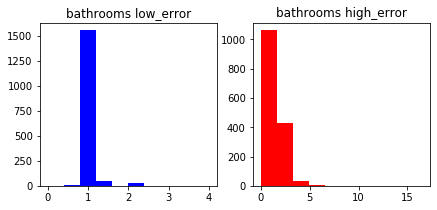

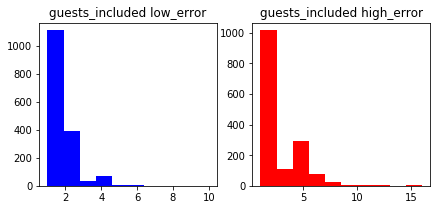

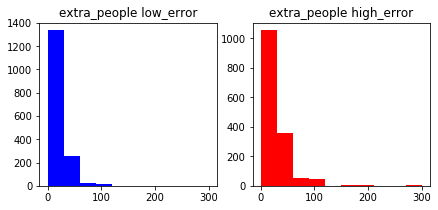

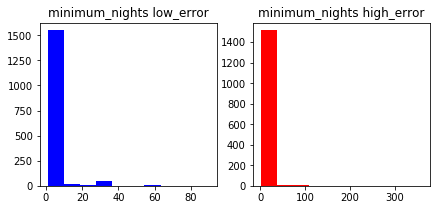

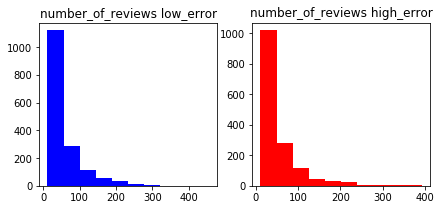

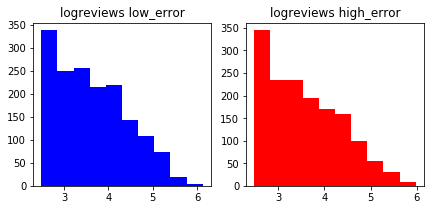

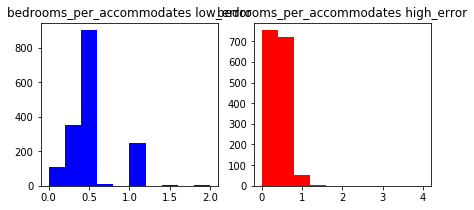

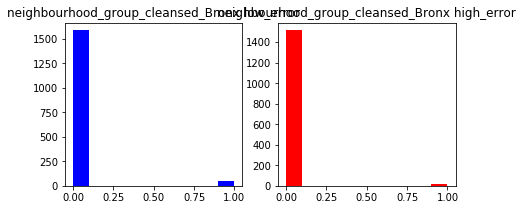

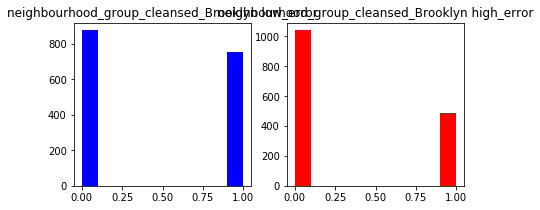

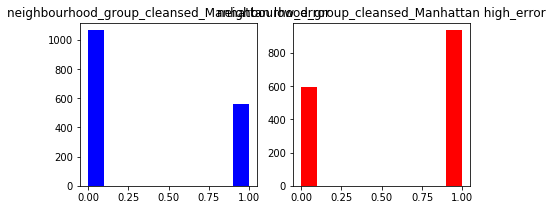

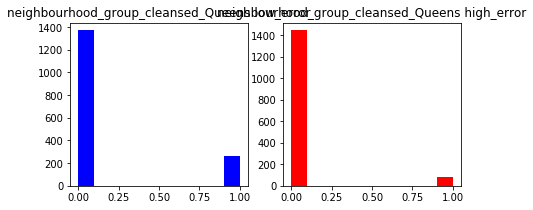

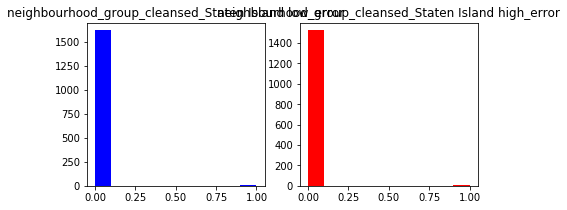

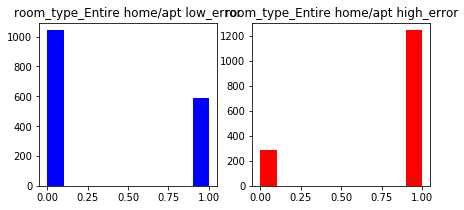

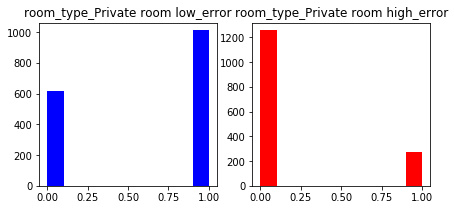

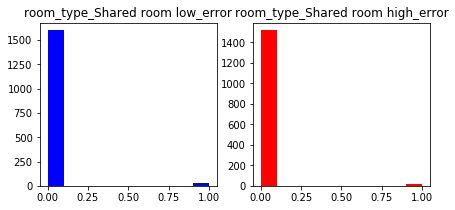

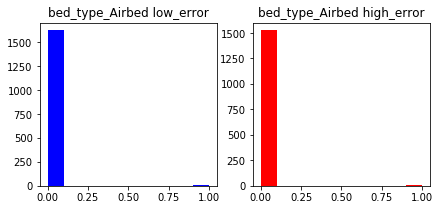

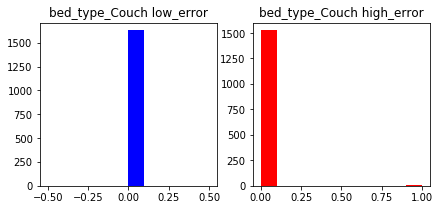

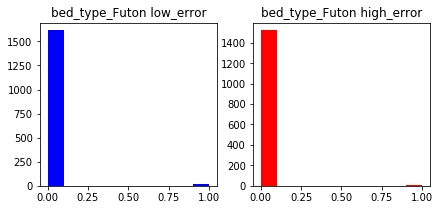

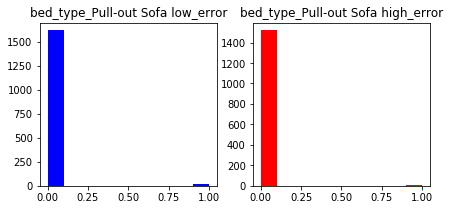

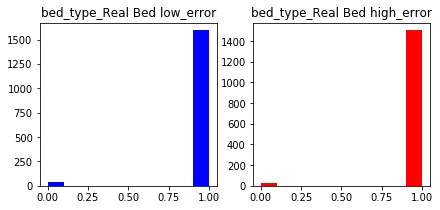

In [590]:
for c in high_error.columns:
    plt.figure(figsize=(7,3))
    plt.subplot(121)
    plt.hist(low_error[c], color='b')
    plt.title(c + ' low_error')
    plt.subplot(122)
    plt.hist(high_error[c], color='r')
    plt.title(c + ' high_error')
    plt.show()

In [394]:
#fill missing values for last review and reviews per month with 0
df[["last_review", "reviews_per_month"]] = df[["last_review", "reviews_per_month"]].fillna(0)

#if there is no host name or listing name fill in None
df[["name", "host_name"]] = df[["name", "host_name"]].fillna("None")

#Drop rows were price of the listing is 0. We are not intersted in "free" 
#listings as they are most likely an error.
free = len(df[df.price == 0])
df = df[df.price != 0].copy()

#Print initial insights:
print("The initial dataset contained " + str(free)+ " listings with price of 0 USD, that had been removed")
print("There are " + str(len(df["id"].unique()))+" listings")
print("There are "+str(len(df.host_id.unique()))
      +" unique and indentifiable "+ "hosts.")
print("There are "+str(len(df[df["host_name"]=="None"]))
      +" unindentifiable "+ "hosts.")
print("Dataframe shape: "+str(df.shape))

KeyError: "None of [Index(['last_review', 'reviews_per_month'], dtype='object')] are in the [columns]"

In [ ]:
(len(df[df["host_id"]==1910170]) == df[df["id"]==22267382]["calculated_host_listings_count"]).tolist()

In [ ]:
df[(df["calculated_host_listings_count"]>1)][["host_id","calculated_host_listings_count"]].sort_values(by=['host_id']).head(10)

In [ ]:
df_old=df.copy()
df = df[df["minimum_nights"] <=31].copy()
removed_listings = len(df_old)-len(df)

fig = plt.figure(figsize=(14,3))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)


ax1.hist(df_old.minimum_nights, bins=100, log=True)
ax1.set_ylabel("Frequency")
ax1.set_title("No limit on minimum nights")

ax2.hist(df.minimum_nights, bins=31, log=True)
ax2.set_ylabel("Frequency")
ax2.set_title("Maximum 31 minimum nights")

plt.show()

print("As a result of imposing minimum nights limit, " + str(removed_listings)+" listings were removed.")

In [ ]:
df.isnull().sum()

In [ ]:
df.describe().iloc[:,0:8]

In [33]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group_cleansed       object
neighbourhood_cleansed             object
minimum_nights                      int64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
dtype: object

In [ ]:
#separate out numerical variables
a=pd.DataFrame(df.dtypes.copy())
b= a[a[0] != 'object'].reset_index()
#drop id and host id:
numeric_vars=b["index"].tolist()[2:]

fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)

ax1.hist(df[numeric_vars[0]], bins=30)
ax1.set_ylabel("Frequency")
ax1.set_title(numeric_vars[0])

ax2.hist(df[numeric_vars[1]], bins=30)
ax2.set_ylabel("Frequency")
ax2.set_title(numeric_vars[1])

ax3.hist((df[numeric_vars[2]]), bins=30)
ax3.set_ylabel("Frequency")
ax3.set_title('price')

ax4.hist(df[numeric_vars[3]], bins=31)
ax4.set_ylabel("Frequency")
ax4.set_title(numeric_vars[3])

ax5.hist(df[numeric_vars[4]], bins=30)
ax5.set_ylabel("Frequency")
ax5.set_title("number of reviews")

ax6.hist(df[numeric_vars[5]], bins=30)
ax6.set_ylabel("Frequency")
ax6.set_title("last review")

ax7.hist(df[numeric_vars[6]], bins=30)
ax7.set_ylabel("Frequency")
ax7.set_title(numeric_vars[6])

ax8.hist(df[numeric_vars[7]])
ax8.set_ylabel("Frequency")
ax8.set_title(numeric_vars[7])
plt.show()

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11c3f2048> (for post_execute):


KeyboardInterrupt: 